# MÉTODOS Y TÉCNICAS EN NEUROCIENCIAS. 


In [65]:
# Se importan las librerías con las que se trabajará en todo el TP. 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as sm
import stats
from scipy import stats
import statsmodels.api as sm
from IPython.display import display, Markdown
import warnings
warnings.filterwarnings('ignore')

## Unidad 1. 
## Tema Clase 1:
**Estadística Descriptiva**

Presentación de la información. Frecuencias. Frecuencia absoluta y frecuencia relativa. Gráficos de barras. Medidas descriptivas centrales y de dispersión. Gráficos de distribución de frecuencias y cajas.


**Actividad práctica:**

El objetivo de la actividad práctica es realizar un análisis exploratorio de una base de datos con el fin de describir tendencias centrales y dispersión de las variables, en el espacio uni y bivariado.

**Planteamiento del problema**

Un grupo de investigadores realizó un estudio con el fin de evaluar si existen diferencias en características estructurales del cerebro entre personas con esquizofrenia y desórdenes bipolares, en relación a los sujetos sanos. Asimismo, estudiaron los niveles de vitamina D en estos sujetos, ya que trabajos previos habían asociado los niveles de esta vitamina en personas con esquizofrenia y desórdenes depresivos con cambios estructurales, tales como una reducción de volumen cerebral. 

La muestra obtenida incluyó 83 pacientes y 101 sujetos sanos como grupo control. Se midió el nivel de vitamina D y se obtuvieron imágenes de resonancia magnética estructural (T1) de cada sujeto. A partir de las imágenes se calcularon el volumen de sustancia gris y blanca, el volumen cerebral total, el volumen de sustancia gris periférica y el volumen ventricular. Los datos fueron volcados a una base de datos anonimizada. 

La base de datos del estudio se encuentra en el archivo “Base_Brain_Vol.xlsx” y será usada para resolver el ejercicio. Las variables incluidas son:
 
**Códigos de las variables en la base de datos:**	

* **Tratamiento (2 niveles):** Control, Paciente		
* **Diagnóstico (3 niveles):** Control, Esquizofrenia, Desorden_bipolar 
* **Genero (2 niveles):** Masculino M, Femenino F
* **GMV:** Volumen de la sustancia gris
* **WMV:** Volumen de la sustancia blanca
* **WholeBrain:** Volumen del cerebro
* **GM_Peripheral:** Volumen periférico de sustancia gris 
* **VentricularCSF:** Líquido cefalorraquídeo ventricular 
* **Vitamin_D_nmog:** Vitamina D suministrada

**Ejercicio**

Resolver las siguientes consignas 

**1)** Para cada una de las variables de la base, identificar el tipo de dato que describen.

**2)** Describir la información contenida en cada variable, aplicando gráficos adecuados a cada tipo de dato. 

**3)** Para las variables que sea pertinente, obtenga las medidas de tendencia central y dispersión para toda la muestra y para cada grupo Tratamiento.
 



### **Respuesta 1):**

**Tratamiento:** Nominal

**Diagnostico:** Nominal

**Genero:** Nominal

**GMV:** Contínua

**WMV:** Contínua

**WholeBrain:** Contínua

**GM_Peripheral:** Contínua

**VentricularCSV:** Contínua

**Vitamin_D_nmog:** Discreta


### **Respuesta 2):**

In [66]:
# Importo el dataset 
url = 'https://raw.githubusercontent.com/xlisouski/Neurociencia/main/Base_Brain_Vol.xlsx'
df = pd.read_excel(url)
print('Vista Preliminar del Set de Datos:')
df.head()

Vista Preliminar del Set de Datos:


,Tratamiento,Diagnostico,Genero,GMV,WMV,WholeBrain,GM_Peripheral,VentricularCSF,Vitamin_D_nmog
0,Control,Control,M,654097.48,590566.13,1244663.61,512258.22,24331.71,52
1,Control,Control,F,583265.51,461842.69,1045108.20,454976.60,14006.30,58
2,Control,Control,F,663013.01,587237.48,1250250.49,506423.31,26589.96,48
3,Control,Control,M,688389.00,689759.62,1378148.62,527831.04,33834.65,59
4,Control,Control,F,667694.97,519499.61,1187194.58,525269.21,28352.00,50


In [67]:
# Descripción general de variables numéricas
df.describe().round()

,GMV,WMV,WholeBrain,GM_Peripheral,VentricularCSF,Vitamin_D_nmog
count,183.0,183.0,183.0,183.0,183.0,183.0
mean,653842.0,562068.0,1215910.0,514544.0,26026.0,53.0
std,58427.0,60776.0,110560.0,47432.0,9784.0,19.0
min,513838.0,434723.0,978836.0,396017.0,9751.0,14.0
25%,615068.0,519611.0,1145597.0,482651.0,19763.0,40.0
50%,654097.0,558128.0,1210463.0,512102.0,24345.0,52.0
75%,689568.0,599756.0,1286400.0,545081.0,29788.0,66.0
max,831468.0,802059.0,1611519.0,662556.0,77224.0,111.0


#### Tratamiento 
Al ser una variable nominal con ciertas categorías posibles, se sugiere visualizarla a través de un gráfico de barras. 

In [68]:
# Valores distintos:
print('Valores Posibles: ') 
print(df['Tratamiento'].unique())

Valores Posibles: 
['Control' 'Paciente']


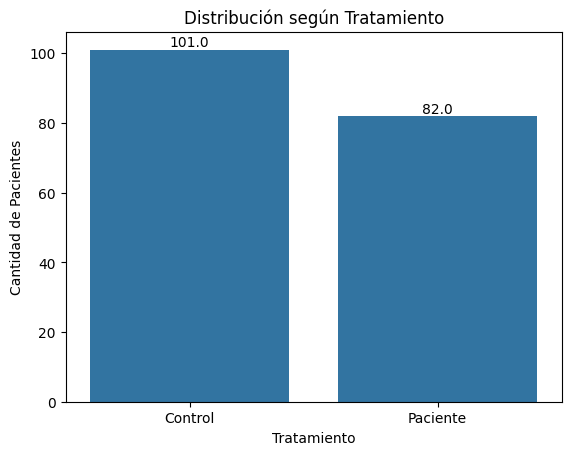

In [69]:
ax = sns.countplot(data = df,x = 'Tratamiento')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.title('Distribución según Tratamiento')
plt.xlabel('Tratamiento')
plt.ylabel('Cantidad de Pacientes')
plt.show()

#### Diagnóstico 
Al ser una variable nominal con ciertas categorías posibles, se sugiere visualizarla a través de un gráfico de rueda. 

In [70]:
# Valores distintos:
print('Valores Posibles: ') 
print(df['Diagnostico'].unique())

Valores Posibles: 
['Control' 'Esquizofrenia' 'Desorden_bipolar']


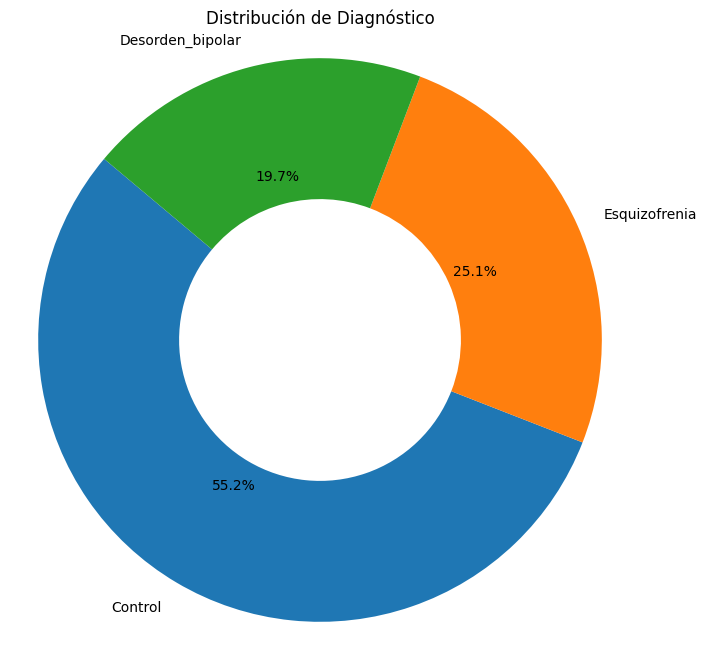

In [71]:
plt.figure(figsize=(8, 8))
category_counts = df['Diagnostico'].value_counts()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, 
        wedgeprops=dict(width=0.5))
plt.title('Distribución de Diagnóstico')
plt.axis('equal')
plt.show()

#### Genero 
Al ser una variable nominal con ciertas categorías posibles, se sugiere visualizarla a través de un gráfico de barras. 

In [72]:
# Valores distintos:
print('Valores Posibles: ') 
print(df['Genero'].unique())

Valores Posibles: 
['M' 'F']


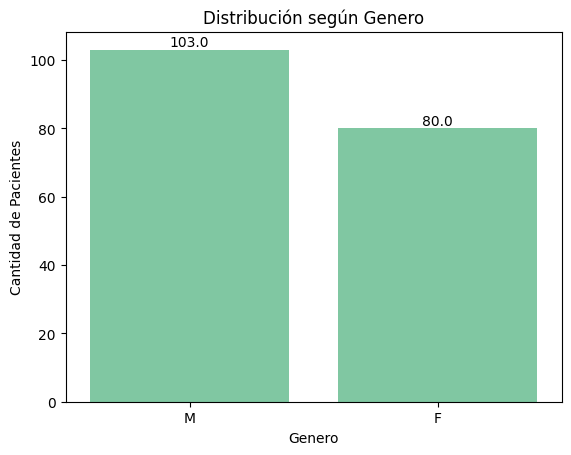

In [73]:
ax = sns.countplot(data = df,
                   x = 'Genero',
                   color = '#74D3A2')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.title('Distribución según Genero')
plt.xlabel('Genero')
plt.ylabel('Cantidad de Pacientes')
plt.show()

### GMV
Al ser una variable contínua, se propone un histograma marcando sus medidas de tendencia central y de posición. 

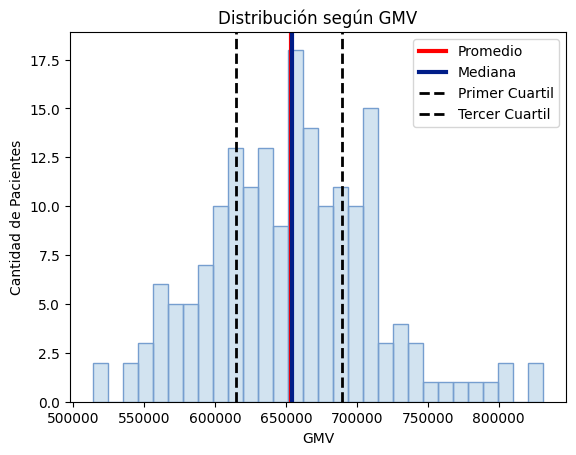

In [74]:
plt.figure()
sns.histplot(data = df,
             x = 'GMV',
             bins = 30,            
             alpha = 0.2,
             edgecolor = '#769ECF')

plt.axvline(x = df['GMV'].mean(), 
            color = 'red', 
            linestyle = '-', 
            label = 'Promedio',
            linewidth = 3)

plt.axvline(x = df['GMV'].median(), 
            color = '#001D88', 
            linestyle = '-', 
            label = 'Mediana',
            linewidth = 3)

plt.axvline(x = df['GMV'].quantile(0.25), 
            color = 'black', 
            linestyle = '--', 
            label = 'Primer Cuartil',
            linewidth = 2)

plt.axvline(x = df['GMV'].quantile(0.75), 
            color = 'black', 
            linestyle = '--', 
            label = 'Tercer Cuartil',
            linewidth = 2)

plt.title('Distribución según GMV')
plt.xlabel('GMV')
plt.ylabel('Cantidad de Pacientes')
plt.legend()
plt.show()

### WMV
Al ser una variable contínua, se propone un boxplot. 

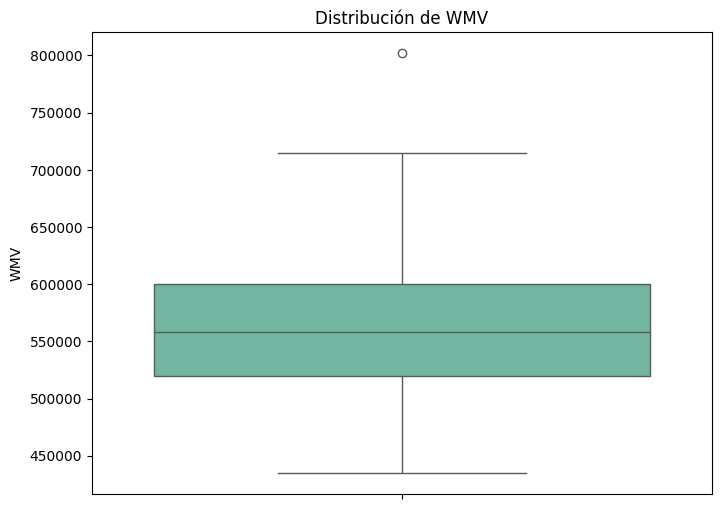

In [75]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='WMV', data=df, palette='Set2')
plt.title('Distribución de WMV')
plt.show()

### WholeBrain
Al ser una variable contínua, se propone un histograma marcando sus medidas de tendencia central y de posición, agregamndo la curva de tendencia. 

Text(0.5, 1.0, 'Distribución de WholeBrain')

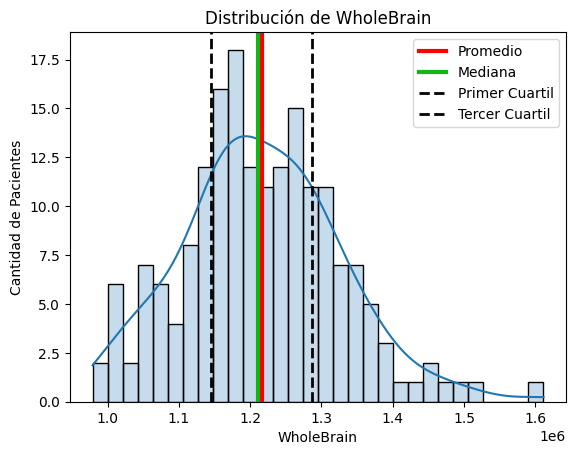

In [76]:
variable_target = df['WholeBrain']
media = variable_target.mean()
mediana = variable_target.median()
primer_cuartil = variable_target.quantile(0.25)
tercer_cuartil = variable_target.quantile(0.75)

# Luego grafico
plt.figure()
# Histograma
sns.histplot(data = df,
             x = 'WholeBrain',
             bins = 30,            
             alpha = 0.25,
             kde = True)
# Agrego linea de promedio 
plt.axvline(x = media, 
            color = 'red', 
            linestyle = '-', 
            label = 'Promedio',
            linewidth = 3)
# Agrego linea de mediana 
plt.axvline(x = mediana, 
            color = '#11B613', 
            linestyle = '-', 
            label = 'Mediana',
            linewidth = 3)
# Agrego linea de primer cuartil 
plt.axvline(x = primer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Primer Cuartil',
            linewidth = 2)
# Agrego linea de tercer cuartil 
plt.axvline(x = tercer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Tercer Cuartil',
            linewidth = 2)

plt.legend()
plt.ylabel('Cantidad de Pacientes')
plt.title('Distribución de WholeBrain')

### GM_Peripheral
Al ser una variable contínua, se propone un histograma marcando sus medidas de tendencia central y de posición, agregamndo la curva de tendencia. 

Text(0.5, 1.0, 'Distribución de GM_Peripheral')

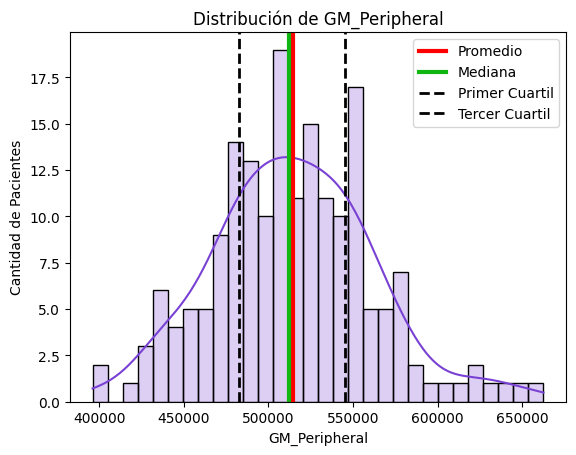

In [77]:
variable_target = df['GM_Peripheral']
media = variable_target.mean()
mediana = variable_target.median()
primer_cuartil = variable_target.quantile(0.25)
tercer_cuartil = variable_target.quantile(0.75)

# Luego grafico
plt.figure()
# Histograma
sns.histplot(data = df,
             x = 'GM_Peripheral',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             color = '#7941D4')
# Agrego linea de promedio 
plt.axvline(x = media, 
            color = 'red', 
            linestyle = '-', 
            label = 'Promedio',
            linewidth = 3)
# Agrego linea de mediana 
plt.axvline(x = mediana, 
            color = '#11B613', 
            linestyle = '-', 
            label = 'Mediana',
            linewidth = 3)
# Agrego linea de primer cuartil 
plt.axvline(x = primer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Primer Cuartil',
            linewidth = 2)
# Agrego linea de tercer cuartil 
plt.axvline(x = tercer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Tercer Cuartil',
            linewidth = 2)

plt.legend()
plt.xlabel('GM_Peripheral')
plt.ylabel('Cantidad de Pacientes')
plt.title('Distribución de GM_Peripheral')

### VentricularCSF
Al ser una variable contínua, se propone un boxplot. 

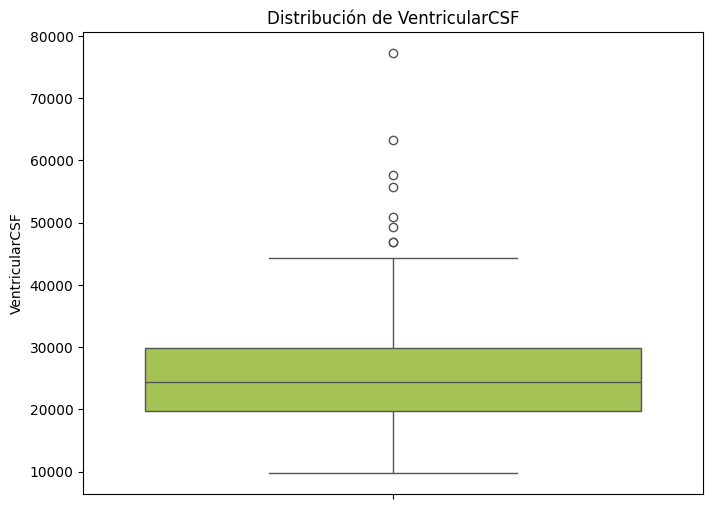

In [78]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='VentricularCSF', data=df, color = '#ACD441')
plt.title('Distribución de VentricularCSF')
plt.show()

### Vitamin_D_nmog
Al ser una variable discreta, se propone un histograma marcando sus medidas de tendencia central y de posición, agregando la curva de tendencia. 

Text(0.5, 1.0, 'Distribución de Vitamin_D_nmog')

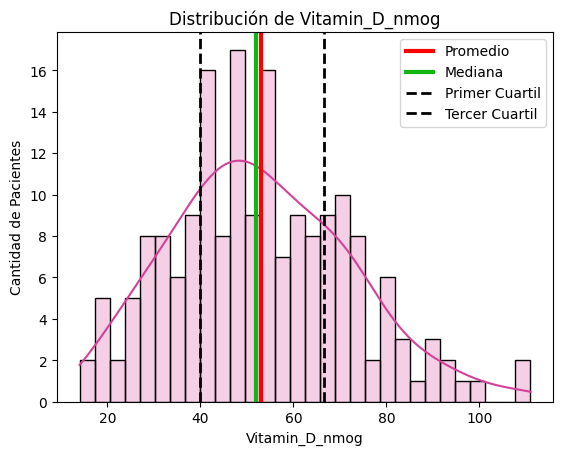

In [79]:
variable_target = df['Vitamin_D_nmog']
media = variable_target.mean()
mediana = variable_target.median()
primer_cuartil = variable_target.quantile(0.25)
tercer_cuartil = variable_target.quantile(0.75)

# Luego grafico
plt.figure()
# Histograma
sns.histplot(data = df,
             x = 'Vitamin_D_nmog',
             bins = 30,            
             alpha = 0.25,
             kde = True,
             color = '#D4419A')
# Agrego linea de promedio 
plt.axvline(x = media, 
            color = 'red', 
            linestyle = '-', 
            label = 'Promedio',
            linewidth = 3)
# Agrego linea de mediana 
plt.axvline(x = mediana, 
            color = '#11B613', 
            linestyle = '-', 
            label = 'Mediana',
            linewidth = 3)
# Agrego linea de primer cuartil 
plt.axvline(x = primer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Primer Cuartil',
            linewidth = 2)
# Agrego linea de tercer cuartil 
plt.axvline(x = tercer_cuartil, 
            color = 'black', 
            linestyle = '--', 
            label = 'Tercer Cuartil',
            linewidth = 2)

plt.legend()
plt.xlabel('Vitamin_D_nmog')
plt.ylabel('Cantidad de Pacientes')
plt.title('Distribución de Vitamin_D_nmog')

### **Respuesta 3):**

In [80]:
variables_num = ['GMV', 'WMV', 'WholeBrain', 'GM_Peripheral', 'VentricularCSF','Vitamin_D_nmog']

resumen_t = pd.DataFrame(columns=['Variable','Q1','Mediana', 'Media',   'Q3', 'DesvEst','Rango_Int','CV','Coef_Asime','Coef_Curtosis'])

display(Markdown(f"### Estadísticas Descriptivas de Variables Numéricas"))

for variable in variables_num:
    
    media = df[variable].mean()
    mediana = df[variable].median()
    desvio = df[variable].std()
    primer_cuartil = df[variable].quantile(0.25)
    tercer_cuartil = df[variable].quantile(0.75)
    cv = scipy.stats.variation(df[variable])
    asimetria = scipy.stats.skew(df[variable]) 
    curtosis = scipy.stats.kurtosis(df[variable])    
    
    nueva_fila = pd.DataFrame({        
        'Variable': [variable],
        'Q1': [round(primer_cuartil, 0)], 
        'Mediana': [round(mediana, 0)],
        'Media': [round(media, 2)],       
        'Q3': [round(tercer_cuartil, 0)],
        'DesvEst': [round(desvio, 2)],
        'Rango_Int': [round(tercer_cuartil - primer_cuartil, 0)],
        'CV': [round(cv, 2)],        
        'Coef_Asime': [round(asimetria, 2)],
        'Coef_Curtosis': [round(curtosis, 2)]
    })
    
    
    resumen_t =  pd.concat([resumen_t, nueva_fila], axis=0, ignore_index=True)

resumen_t

### Estadísticas Descriptivas de Variables Numéricas

,Variable,Q1,Mediana,Media,Q3,DesvEst,Rango_Int,CV,Coef_Asime,Coef_Curtosis
0,GMV,615068.0,654097.0,653841.73,689568.0,58426.54,74501.0,0.09,0.30,0.35
1,WMV,519611.0,558128.0,562068.41,599756.0,60775.75,80145.0,0.11,0.47,0.67
2,WholeBrain,1145597.0,1210463.0,1215910.14,1286400.0,110560.12,140803.0,0.09,0.35,0.40
3,GM_Peripheral,482651.0,512102.0,514544.21,545081.0,47432.35,62430.0,0.09,0.26,0.36
4,VentricularCSF,19763.0,24345.0,26026.38,29788.0,9784.31,10025.0,0.37,1.66,4.80
5,Vitamin_D_nmog,40.0,52.0,53.03,66.0,19.30,26.0,0.36,0.39,-0.08


In [105]:
variables_num = ['GMV', 'WMV', 'WholeBrain', 'GM_Peripheral', 'VentricularCSF','Vitamin_D_nmog']
resumen_t = pd.DataFrame(columns=['Variable','Tratamiento','Q1','Mediana','Media','Q3','Desvio','Rango_Int','CV'])

display(Markdown(f"### **Estadísticas según tratamiento**"))
    
for variable_num in variables_num:

    df['Variable'] = variable_num
    agrupaciones = df.groupby(['Variable','Tratamiento']).agg(
            Q1 =(variable_num, lambda x: x.quantile(0.25)),
            Mediana = (variable_num, 'median'),
            Media = (variable_num, 'mean'),
            Q3=(variable_num, lambda x: x.quantile(0.75)),
            Desvio = (variable_num, 'std'),
            Rango_Int=(variable_num, lambda x: x.quantile(0.75) - x.quantile(0.25))
            )
    agrupaciones['CV'] = agrupaciones['Desvio'] / agrupaciones['Media']
    agrupaciones = pd.DataFrame(agrupaciones.reset_index())
    resumen_t =  pd.concat([resumen_t, agrupaciones], axis=0, ignore_index=True)
    
display(resumen_t.round(2))
df = df.drop('Variable', axis=1)

### **Estadísticas según tratamiento**

,Variable,Tratamiento,Q1,Mediana,Media,Q3,Desvio,Rango_Int,CV
0,GMV,Control,620602.21,661329.11,657512.40,694624.15,52315.87,74021.94,0.08
1,GMV,Paciente,607914.59,637465.29,649320.54,683374.43,65220.82,75459.84,0.10
2,WMV,Control,532507.57,568006.08,566813.88,605473.21,59800.66,72965.64,0.11
3,WMV,Paciente,513539.91,548370.71,556223.38,581649.66,61820.54,68109.76,0.11
4,WholeBrain,Control,1167674.10,1225618.56,1224326.28,1300423.34,105515.23,132749.24,0.09
5,WholeBrain,Paciente,1130225.43,1180019.92,1205543.92,1263540.70,116288.94,133315.27,0.10
6,GM_Peripheral,Control,487440.43,521766.93,517650.19,545884.02,42283.34,58443.59,0.08
7,GM_Peripheral,Paciente,476862.16,501884.03,510718.56,543976.48,53113.68,67114.32,0.10
8,VentricularCSF,Control,19423.47,22791.25,24356.48,27608.13,8413.95,8184.66,0.35
9,VentricularCSF,Paciente,21045.56,26522.38,28083.21,33883.44,10951.82,12837.88,0.39


## Tema Clase 2:
**Estadística Inferencial**

Concepto de prueba estadística. Hipótesis nula y alternativa. Error tipo I y error tipo II. Nivel de significación. Estadístico de la prueba. Valor P. Pruebas estadísticas inferenciales. Prueba t-Student para una y dos medias.


**Actividad práctica:**

El objetivo de la actividad es realizar pruebas de comparación de medias, evaluar los supuestos de las mismas e interpretar los resultados obtenidos.


**Ejercicio**

Utilizando el mismo ejemplo de la Clase 1, resolver las siguientes consignas 

**1)** Con respecto a cada una de las variables que describen propiedades volumétricas del cerebro ¿considera que los grupos presentan diferencias observables de acuerdo al Tratamiento? Obtenga gráficos que sustenten su respuesta.

**2)** Las variables que describen propiedades volumétricas del cerebro, ¿presentan diferencias entre sexos en los sujetos sanos o Control? ¿Se observa lo mismo en los pacientes? Elija una herramienta numérica y una grafica para apoyar su respuesta.

**3)** Los datos de este estudio, ¿apoyan la hipótesis de que existen diferencias significativas en la composición de los tejidos cerebrales entre pacientes con desórdenes psiquiátricos y los sujetos sanos? ¿Que prueba estadística usaría para testear estas diferencias?

En las respuestas incluya los gráficos y los resultados de los análisis estadísticos realizados. Se recomienda resumir la información en tablas para facilitar la presentación de los resultados.


### **Respuesta 1)**

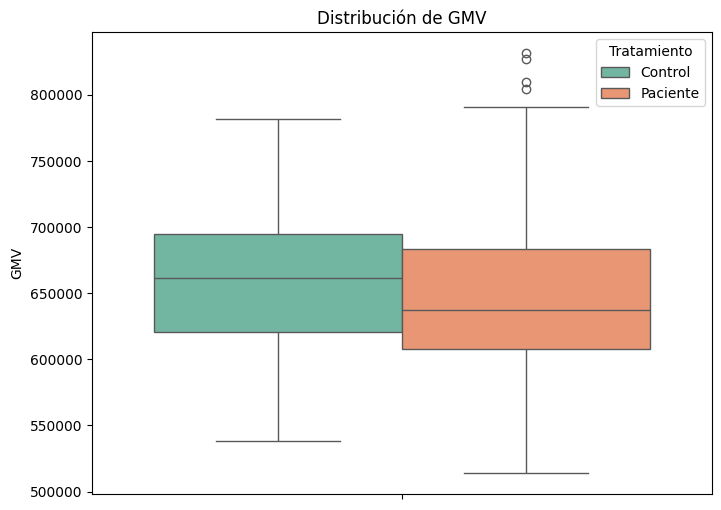

In [82]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='GMV', data=df, palette='Set2', hue = 'Tratamiento')
plt.title('Distribución de GMV')
plt.show()

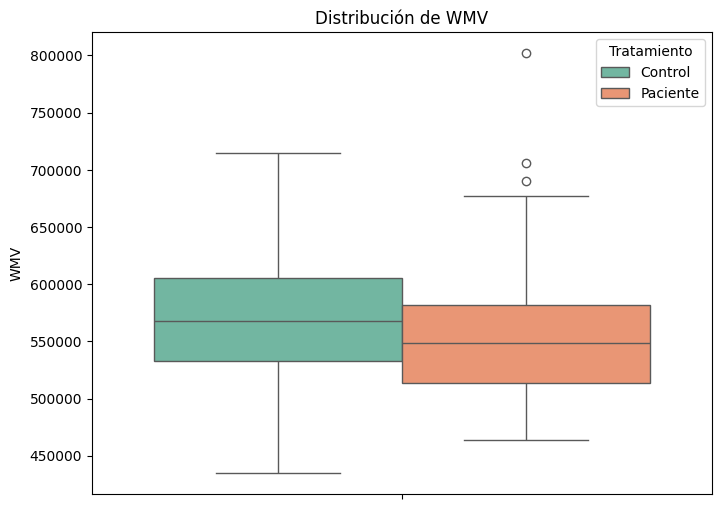

In [83]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='WMV', data=df, palette='Set2', hue = 'Tratamiento')
plt.title('Distribución de WMV')
plt.show()

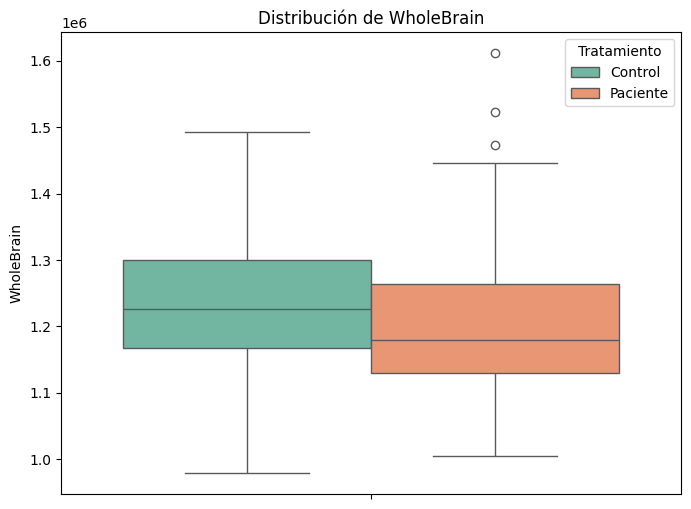

In [84]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='WholeBrain', data=df, palette='Set2', hue = 'Tratamiento')
plt.title('Distribución de WholeBrain')
plt.show()

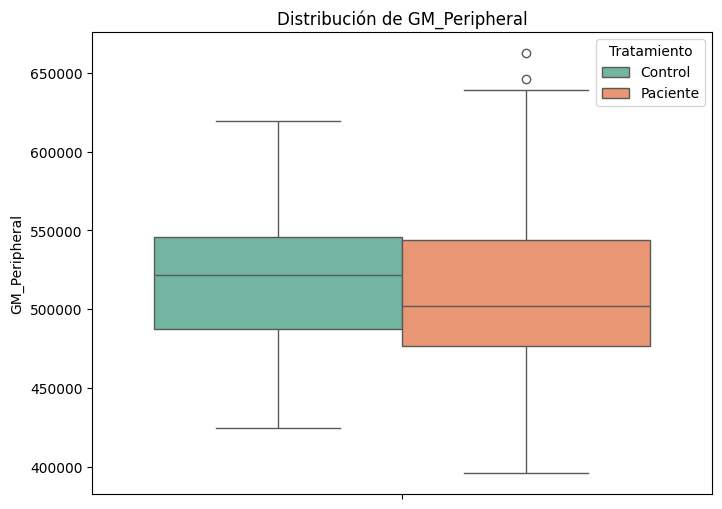

In [85]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='GM_Peripheral', data=df, palette='Set2', hue = 'Tratamiento')
plt.title('Distribución de GM_Peripheral')
plt.show()

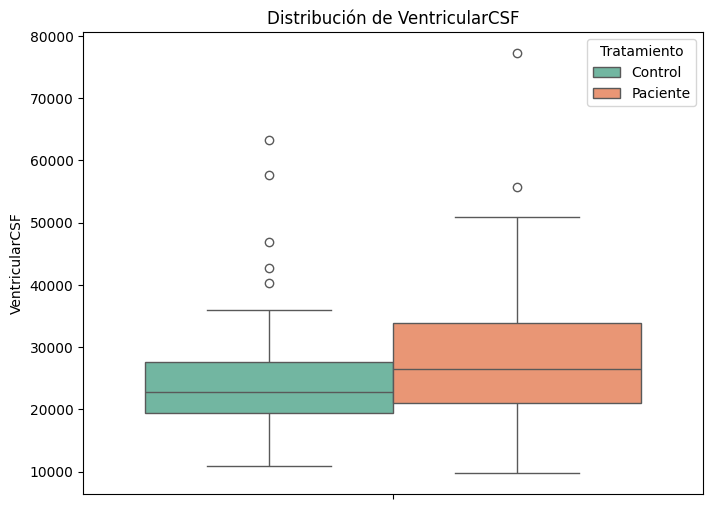

In [86]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='VentricularCSF', data=df, palette='Set2', hue = 'Tratamiento')
plt.title('Distribución de VentricularCSF')
plt.show()

### **Respuesta 2)**

### Gráficos
Se utilizan boxplots para mostrar las diferencias de cada variable que describe propiedades volumétricas del cerebro respecto del tratamiento.

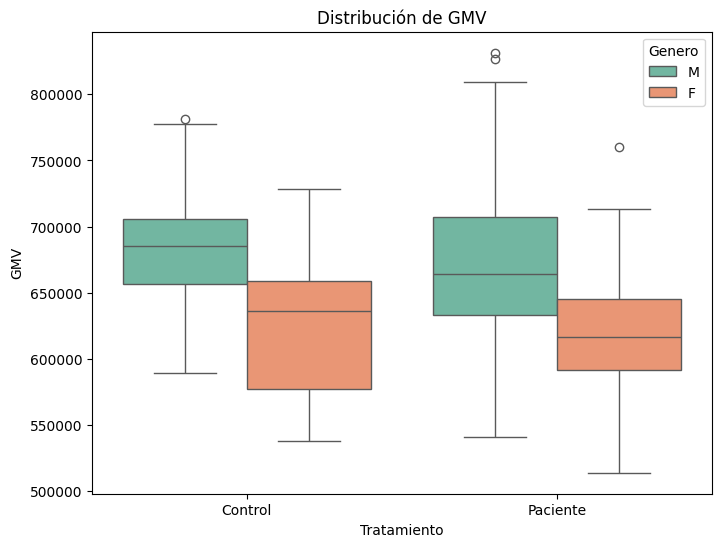

In [87]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='GMV', x='Tratamiento', data=df, palette='Set2', hue = 'Genero')
plt.title('Distribución de GMV')
plt.show()

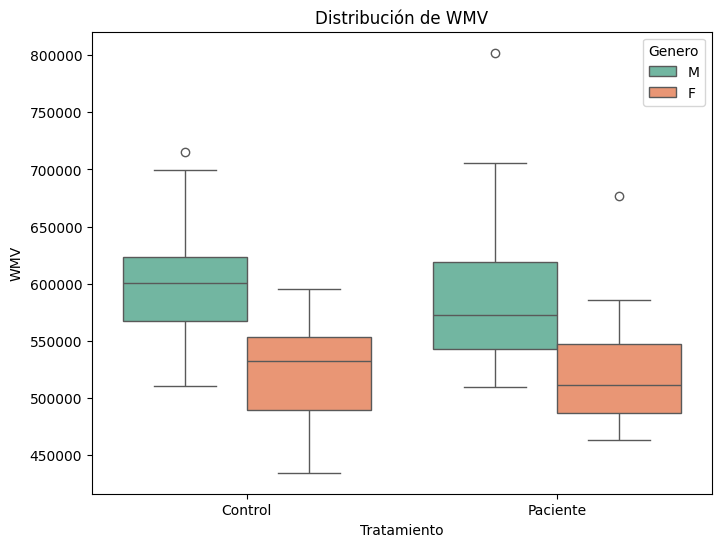

In [88]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='WMV', x='Tratamiento', data=df, palette='Set2', hue = 'Genero')
plt.title('Distribución de WMV')
plt.show()

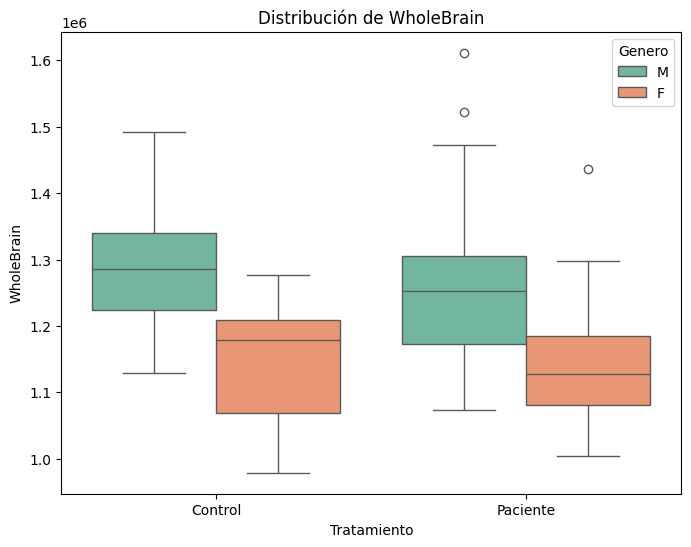

In [89]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='WholeBrain', x='Tratamiento', data=df, palette='Set2', hue = 'Genero')
plt.title('Distribución de WholeBrain')
plt.show()

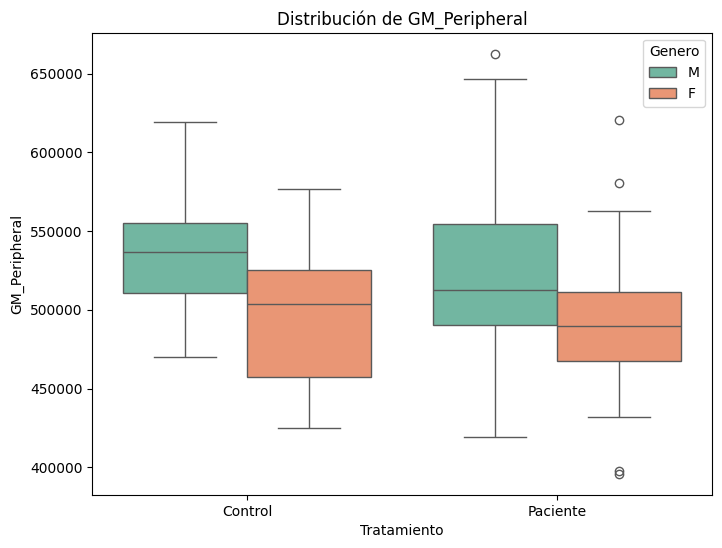

In [90]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='GM_Peripheral', x='Tratamiento', data=df, palette='Set2', hue = 'Genero')
plt.title('Distribución de GM_Peripheral')
plt.show()

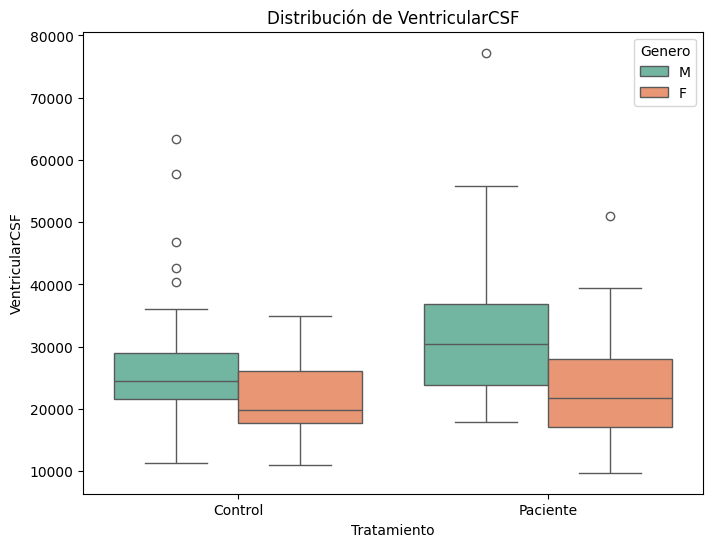

In [91]:
plt.figure(figsize=(8, 6))
sns.boxplot(y='VentricularCSF', x='Tratamiento', data=df, palette='Set2', hue = 'Genero')
plt.title('Distribución de VentricularCSF')
plt.show()

### Soporte Numérico
Se calculará la el primer cuartil, la media, la mediana, el tercer cuartil, el desvío estándar y el coeficiente de variación para cada sub-grupo de análisis, con el objetivo de mostrar las diferencias de cada variable que describe propiedades volumétricas del cerebro respecto del tratamiento.

In [110]:
variables_num = ['GMV', 'WMV', 'WholeBrain', 'GM_Peripheral', 'VentricularCSF']
resumen_t = pd.DataFrame(columns=['Variable','Tratamiento','Genero', 'Q1','Mediana','Media','Q3','Desvio','CV'])

for variable_num in variables_num:
    
    df['Variable'] = variable_num

    agrupaciones = df.groupby(['Variable','Tratamiento','Genero']).agg(
        
        Q1 =(variable_num, lambda x: x.quantile(0.25)),
        Mediana = (variable_num, 'median'),
        Media = (variable_num, 'mean'),
        Q3=(variable_num, lambda x: x.quantile(0.75)),
        Desvio = (variable_num, 'std')
        )
    agrupaciones['CV'] = agrupaciones['Desvio'] / agrupaciones['Media']
    agrupaciones = pd.DataFrame(agrupaciones.reset_index())
    resumen_t =  pd.concat([resumen_t, agrupaciones], axis=0, ignore_index=True)
    
display(resumen_t.round(2))
df = df.drop('Variable', axis=1)

,Variable,Tratamiento,Genero,Q1,Mediana,Media,Q3,Desvio,CV
0,GMV,Control,F,577416.55,636507.90,625216.33,658640.10,47772.56,0.08
1,GMV,Control,M,656366.70,685599.91,680502.81,705558.62,42574.82,0.06
2,GMV,Paciente,F,591447.68,616401.60,622378.29,644942.88,52094.06,0.08
3,GMV,Paciente,M,632836.84,664427.20,672588.85,707322.07,66949.84,0.10
4,WMV,Control,F,489561.46,532367.12,520989.28,553840.12,46214.44,0.09
5,WMV,Control,M,567222.88,600900.67,599434.78,623830.96,45308.57,0.08
6,WMV,Paciente,F,487162.10,511740.98,520108.90,546894.16,44112.00,0.08
7,WMV,Paciente,M,543053.27,573022.23,587413.16,618986.53,58110.15,0.10
8,WholeBrain,Control,F,1069180.52,1179268.36,1146205.61,1209647.61,88719.85,0.08
9,WholeBrain,Control,M,1224181.41,1285333.41,1279937.60,1339458.07,77886.18,0.06


### **Respuesta 3)**
Se utilizarán pruebas de diferencias de medias T para comparar si el valor medio de cada variable que compone los tejidos cerebrales cuenta con diferencias en los distintos grupos tratados. 

In [93]:
def prueba_t(col_cat, col_num, alpha, data_frame):

    categorias = data_frame[col_cat].unique()
    
    muestra1 = data_frame.loc[data_frame[col_cat] == categorias[0],col_num].values
    muestra2 = data_frame.loc[data_frame[col_cat] == categorias[1],col_num].values

    # Realiza la prueba t para muestras independientes
    t_statistic, p_value = stats.ttest_ind(muestra1, muestra2)

    # Interpreta el valor p
    alpha = alpha
    if p_value < alpha:
        rta = "Rechazamos H0"
        interp = "Hay diferencia significativa entre medias."
    else:
        rta = "No rechazamos H0"
        interp = "No hay diferencia significativa entre medias."
    return p_value, t_statistic, rta, interp

In [94]:
variables_num = ['GMV', 'WMV', 'WholeBrain', 'GM_Peripheral', 'VentricularCSF','Vitamin_D_nmog']
resumen_t = pd.DataFrame(columns=['Variable','P_Valor','Estadistico','Decision','Interpretacion'])

display(Markdown(f"### Pruebas T para validar diferencias de medias según Diagnóstico"))

for variable_num in variables_num:

    t_prueba = prueba_t('Diagnostico', variable_num, 0.05, df)
    
    nueva_fila = pd.DataFrame({
    'Variable': [variable_num],
    'P_Valor': [round(t_prueba[0],4)],
    'Estadistico': [round(t_prueba[1],2)],
    'Decision': [t_prueba[2]],
    'Interpretacion': [t_prueba[3]]
    })    
    
    resumen_t =  pd.concat([resumen_t, nueva_fila], axis=0, ignore_index=True)

resumen_t

### Pruebas T para validar diferencias de medias según Diagnóstico

,Variable,P_Valor,Estadistico,Decision,Interpretacion
0,GMV,0.2962,1.05,No rechazamos H0,No hay diferencia significativa entre medias.
1,WMV,0.1784,1.35,No rechazamos H0,No hay diferencia significativa entre medias.
2,WholeBrain,0.1972,1.30,No rechazamos H0,No hay diferencia significativa entre medias.
3,GM_Peripheral,0.2091,1.26,No rechazamos H0,No hay diferencia significativa entre medias.
4,VentricularCSF,0.1400,-1.48,No rechazamos H0,No hay diferencia significativa entre medias.
5,Vitamin_D_nmog,0.0628,1.87,No rechazamos H0,No hay diferencia significativa entre medias.


In [95]:
variables_num = ['GMV', 'WMV', 'WholeBrain', 'GM_Peripheral', 'VentricularCSF','Vitamin_D_nmog']
resumen_t = pd.DataFrame(columns=['Variable','P_Valor','Estadistico','Decision','Interpretacion'])

display(Markdown(f"### Pruebas T para validar diferencias de medias según Tratamiento"))

for variable_num in variables_num:

    t_prueba = prueba_t('Tratamiento', variable_num, 0.05, df)
    
    nueva_fila = pd.DataFrame({
    'Variable': [variable_num],
    'P_Valor': [round(t_prueba[0],4)],
    'Estadistico': [round(t_prueba[1],2)],
    'Decision': [t_prueba[2]],
    'Interpretacion': [t_prueba[3]]
    })    
    
    resumen_t =  pd.concat([resumen_t, nueva_fila], axis=0, ignore_index=True)

resumen_t

### Pruebas T para validar diferencias de medias según Tratamiento

,Variable,P_Valor,Estadistico,Decision,Interpretacion
0,GMV,0.3470,0.94,No rechazamos H0,No hay diferencia significativa entre medias.
1,WMV,0.2421,1.17,No rechazamos H0,No hay diferencia significativa entre medias.
2,WholeBrain,0.2542,1.14,No rechazamos H0,No hay diferencia significativa entre medias.
3,GM_Peripheral,0.3269,0.98,No rechazamos H0,No hay diferencia significativa entre medias.
4,VentricularCSF,0.0100,-2.60,Rechazamos H0,Hay diferencia significativa entre medias.
5,Vitamin_D_nmog,0.4581,0.74,No rechazamos H0,No hay diferencia significativa entre medias.


## Tema Clase 3:
## Estadística Inferencial
**Pruebas de dependencia y diseños experimentales I. Prueba ANOVA**

**Actividad práctica:**
El objetivo de la actividad es adquirir los elementos básicos para describir y analizar la relación entre dos variables cuantitativas, una discreta y la otra continua.

**Ejercicio**
Analice la base de datos provista para resolver las siguientes preguntas:  

**1)** Grafique las diferencias de medias de cada variable cuantitativa entre los grupos incluidos en la variable Diagnósticos. Analice también las diferencias de medidas entre grupos que combinen la variable Género y Diagnóstico (estos grupos deben ser creados para el ejercicio), ¿qué diferencias puede identificar?

**2)** Los datos de este estudio, ¿apoyan la hipótesis de que existen diferencias en la composición de los tejidos cerebrales entre controles y pacientes con diferentes diagnósticos?

En las respuestas incluya los gráficos y los resultados de los análisis estadísticos realizados. Se recomienda resumir la información en tablas para facilitar la presentación de los resultados.


### **Respuesta 1)**

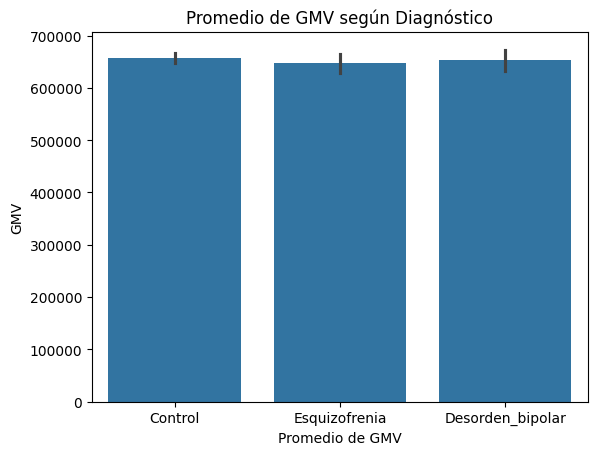

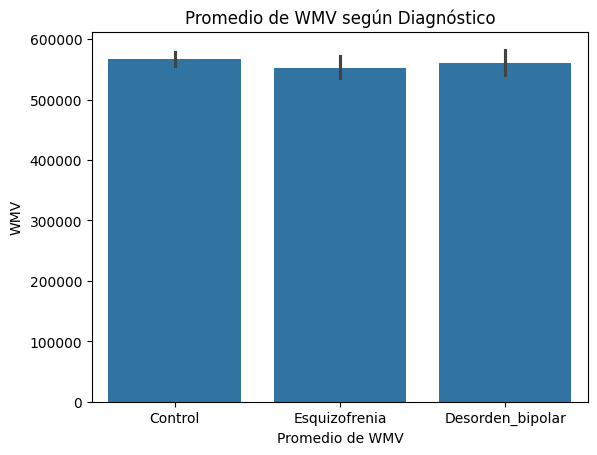

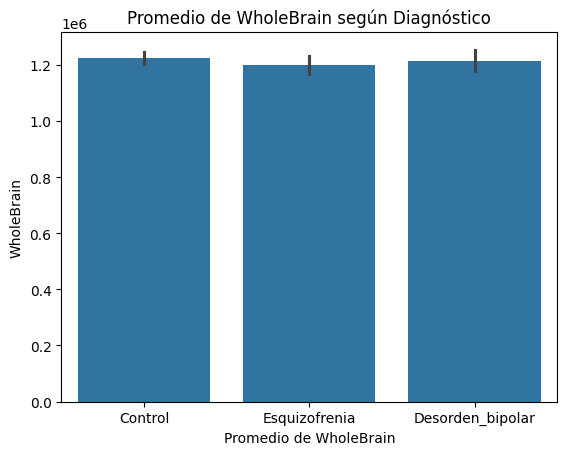

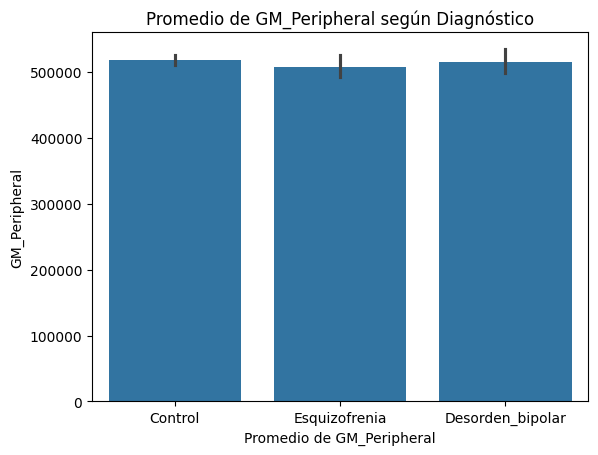

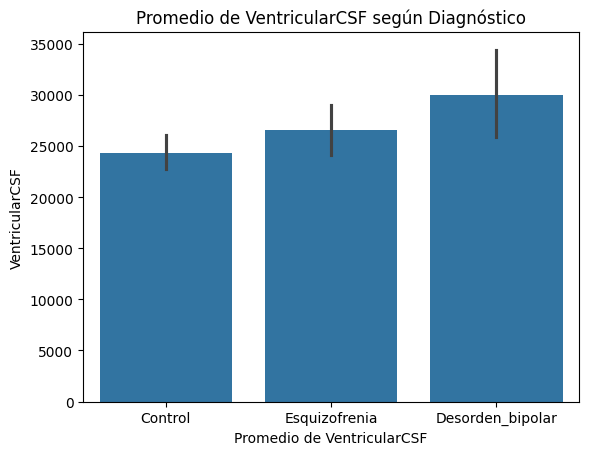

In [96]:
variables_num = ['GMV', 'WMV', 'WholeBrain', 'GM_Peripheral', 'VentricularCSF']

for variable_num in variables_num:
    plt.figure()
    sns.barplot(data = df,
                x = 'Diagnostico',
                y = variable_num)
    plt.title('Promedio de '+variable_num+ ' según Diagnóstico')
    plt.xlabel('Promedio de '+variable_num)
    plt.show()

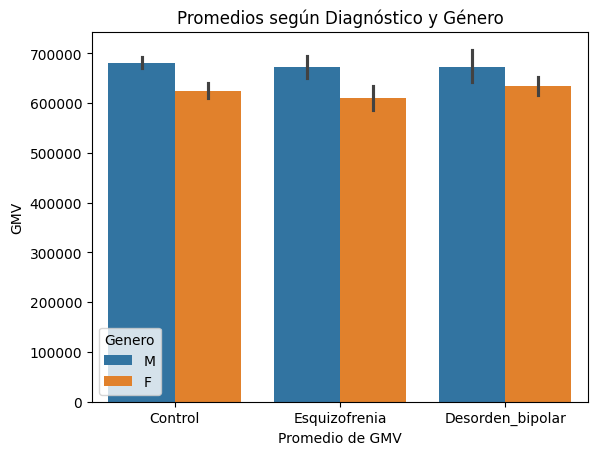

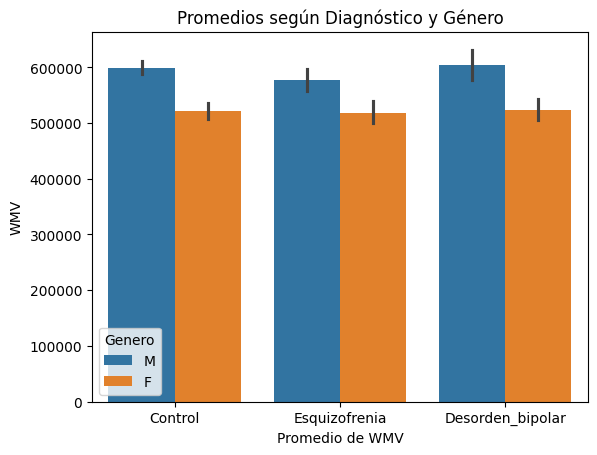

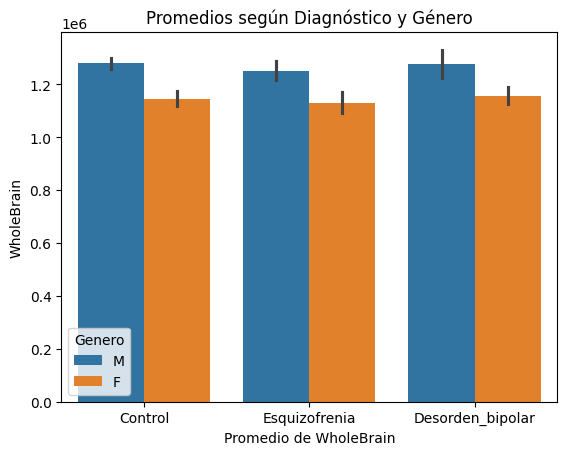

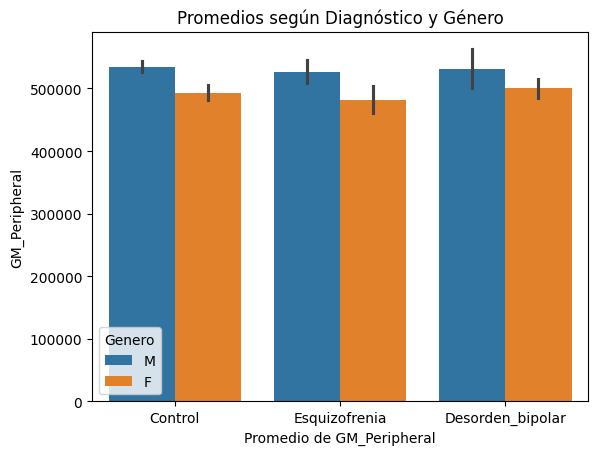

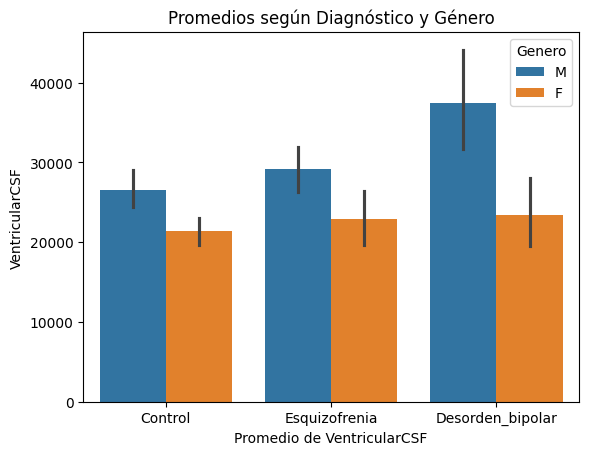

In [97]:
variables_num = ['GMV', 'WMV', 'WholeBrain', 'GM_Peripheral', 'VentricularCSF']

for variable_num in variables_num:
    plt.figure()
    sns.barplot(data = df,
                x = 'Diagnostico',
                y = variable_num,
                hue = 'Genero')
    plt.title('Promedios según Diagnóstico y Género')
    plt.xlabel('Promedio de '+variable_num)
    plt.show()

### **Respuesta 2)**

In [98]:
variables_num = ['GMV', 'WMV', 'WholeBrain', 'GM_Peripheral', 'VentricularCSF']
resumen_t = pd.DataFrame(columns=['Variable','P_Valor','Estadistico','Decision','Interpretacion'])

display(Markdown(f"### Pruebas ANOVA para validar diferencias de medias según Diagnóstico"))

for variable_num in variables_num:

    grouped = df.groupby(['Diagnostico'])[variable_num]
    group_data = [group.values for name, group in grouped]
    f_statistic, p_value = stats.f_oneway(*group_data)
    
    alpha = 0.05
    if p_value < alpha:
        rta = "Rechazamos H0"
        interp = "Hay diferencia significativa entre medias."
    else:
        rta = "No rechazamos H0"
        interp = "No hay diferencia significativa entre medias."
    
    nueva_fila = pd.DataFrame({
    'Variable': [variable_num],
    'P_Valor': [round(p_value,4)],
    'Estadistico': [round(f_statistic,2)],
    'Decision': [rta],
    'Interpretacion': [interp]
    })    
    
    resumen_t =  pd.concat([resumen_t, nueva_fila], axis=0, ignore_index=True)

resumen_t

### Pruebas ANOVA para validar diferencias de medias según Diagnóstico

,Variable,P_Valor,Estadistico,Decision,Interpretacion
0,GMV,0.5857,0.54,No rechazamos H0,No hay diferencia significativa entre medias.
1,WMV,0.4121,0.89,No rechazamos H0,No hay diferencia significativa entre medias.
2,WholeBrain,0.4418,0.82,No rechazamos H0,No hay diferencia significativa entre medias.
3,GM_Peripheral,0.4716,0.75,No rechazamos H0,No hay diferencia significativa entre medias.
4,VentricularCSF,0.0098,4.74,Rechazamos H0,Hay diferencia significativa entre medias.


In [99]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=df['VentricularCSF'], groups=df['Diagnostico'], alpha=0.05)
print(tukey)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
     group1           group2       meandiff  p-adj    lower      upper    reject
--------------------------------------------------------------------------------
         Control Desorden_bipolar  5675.8821 0.0074  1277.0614 10074.7027   True
         Control    Esquizofrenia  2201.3045 0.4023 -1829.6415  6232.2504  False
Desorden_bipolar    Esquizofrenia -3474.5776 0.2364 -8517.2954  1568.1403  False
--------------------------------------------------------------------------------


## Tema Clase 4
## Estadística Inferencial
**Pruebas de dependencia y diseños experimentales II. Chi-cuadrado. Regresión**

**Actividad práctica:**
El objetivo de la actividad es adquirir los elementos básicos para describir y analizar la relación entre dos variables cuantitativas continuas o discretas.

**1)** Las variables que describen distintas características estructurales del cerebro, ¿están asociadas o varían de forma independiente? Para responder esta pregunta utilice tanto métodos descriptivos gráficos como análisis que permitan estimar la magnitud de asociación entre variables.

**2)** El volumen cerebral total, ¿es un buen predictor del contenido de materia gris, blanca y el volumen del liquido cerebroespinal? Justificar la respuesta a partir de los resultados obtenidos.

**3)** ¿Qué ecuación utilizaría para estimar el volumen de sustancia gris a partir del volumen cerebral total? En la ecuación incluya los valores específicos para el estudio usado en este trabajo práctico.

**4)** Existen diferencias entre sexos en relación a los diagnósticos de Esquizofrenia y Desorden bipolar?


### **Respuesta 1)**

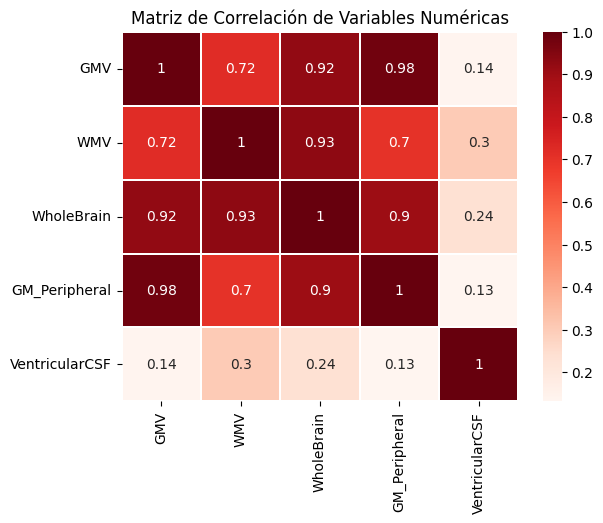

In [100]:
matriz_correlacion = df[variables_num].corr(method='pearson')
sns.heatmap(abs(matriz_correlacion),
                linewidths = 0.3,
                annot = True,
                cmap = 'Reds')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()

### Relación entre Variables Numéricas

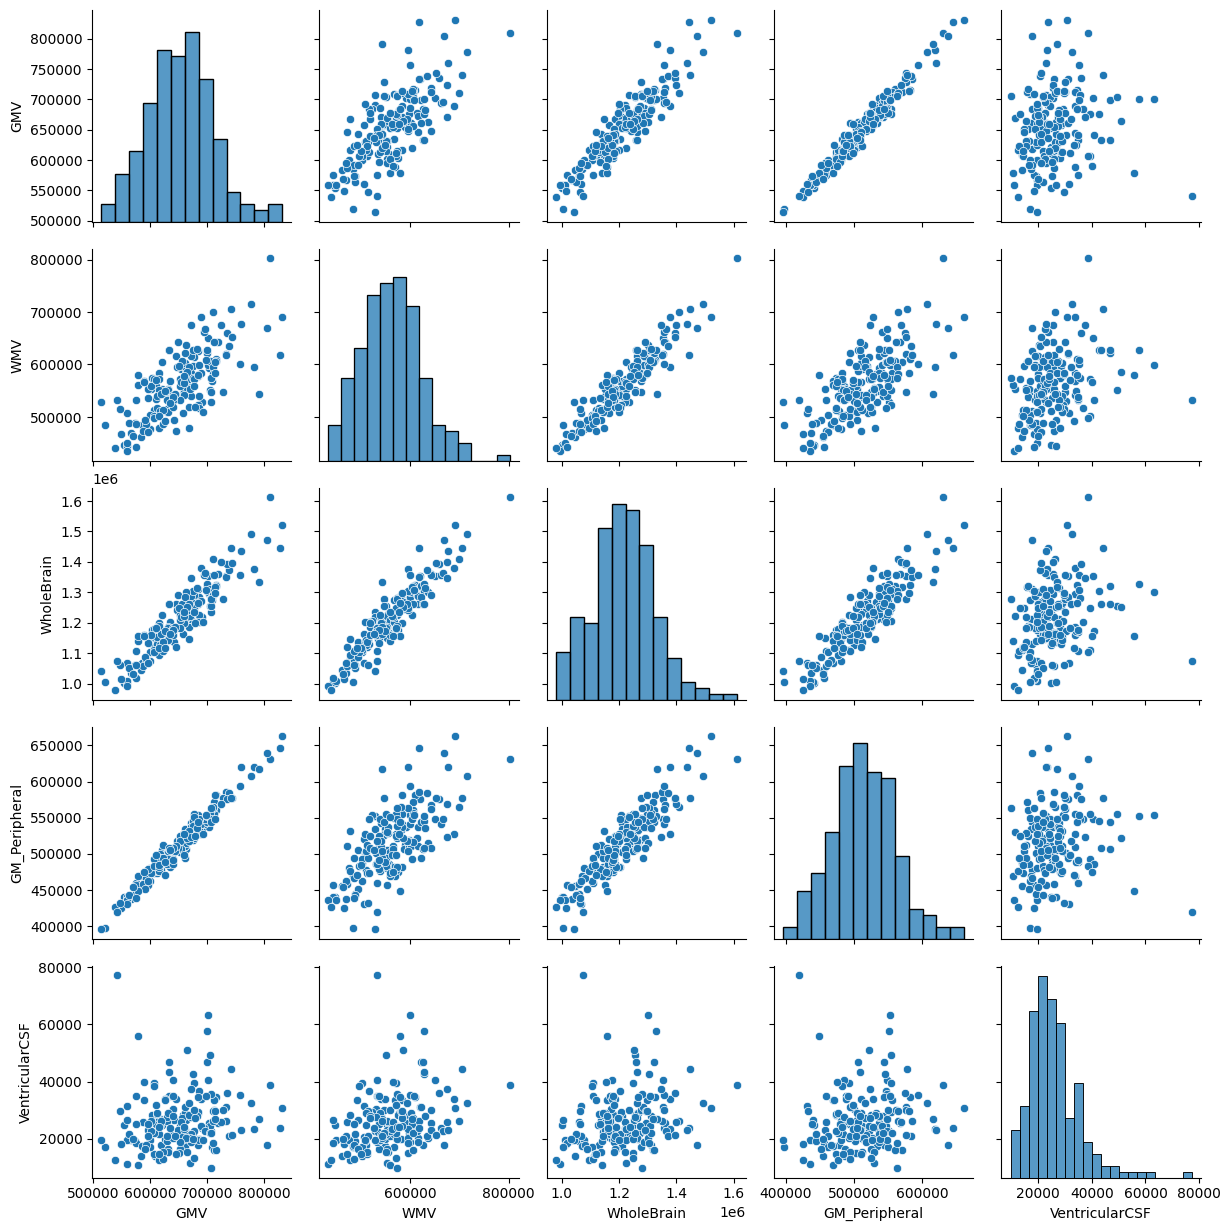

In [101]:
# Crear el Pairplot 
display(Markdown(f"### Relación entre Variables Numéricas"))
sns.pairplot(df[variables_num])
plt.show()

### **Respuesta 2)**

### Predicción de Y: **GMV** en función de X: **WholeBrain**

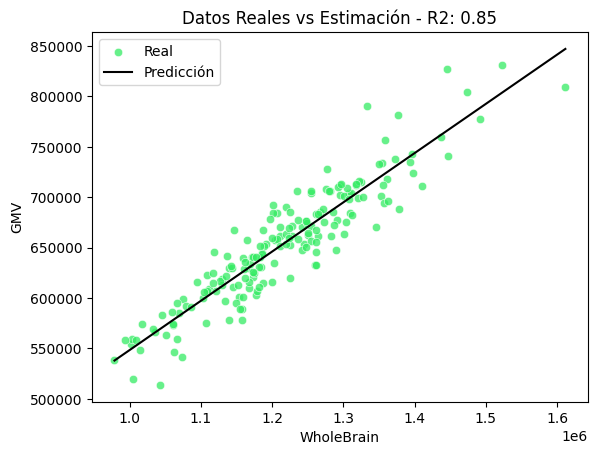

                            OLS Regression Results                            
Dep. Variable:                    GMV   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     1064.
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           1.01e-77
Time:                        01:46:36   Log-Likelihood:                -2091.2
No. Observations:                 183   AIC:                             4186.
Df Residuals:                     181   BIC:                             4193.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.981e+04   1.83e+04      3.271      0.0

### Predicción de Y: **WMV** en función de X: **WholeBrain**

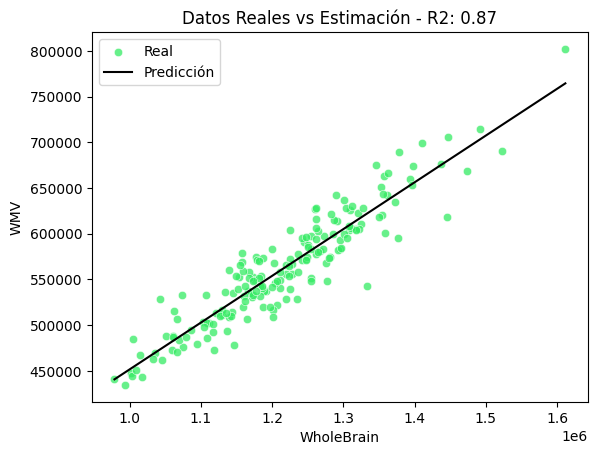

                            OLS Regression Results                            
Dep. Variable:                    WMV   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     1166.
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           8.02e-81
Time:                        01:46:36   Log-Likelihood:                -2091.2
No. Observations:                 183   AIC:                             4186.
Df Residuals:                     181   BIC:                             4193.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.981e+04   1.83e+04     -3.271      0.0

### Predicción de Y: **GM_Peripheral** en función de X: **WholeBrain**

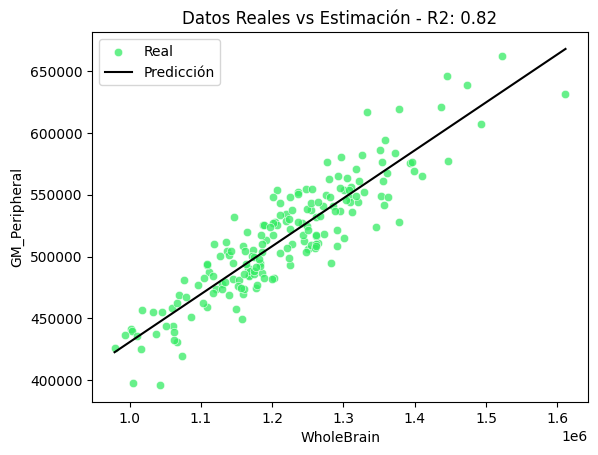

                            OLS Regression Results                            
Dep. Variable:          GM_Peripheral   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     818.4
Date:                Tue, 03 Sep 2024   Prob (F-statistic):           4.57e-69
Time:                        01:46:36   Log-Likelihood:                -2073.2
No. Observations:                 183   AIC:                             4150.
Df Residuals:                     181   BIC:                             4157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.249e+04   1.66e+04      2.565      0.0

### Predicción de Y: **VentricularCSF** en función de X: **WholeBrain**

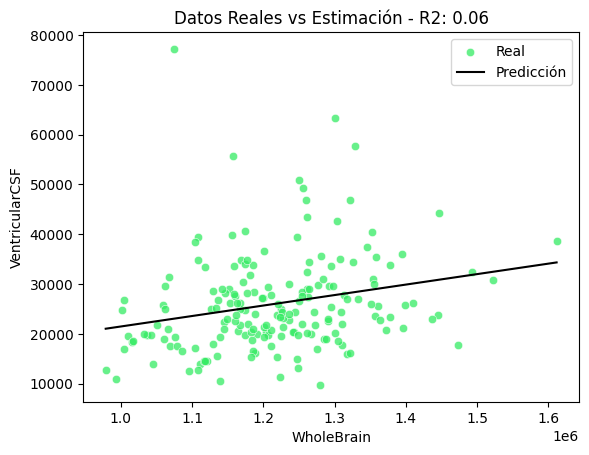

                            OLS Regression Results                            
Dep. Variable:         VentricularCSF   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     10.84
Date:                Tue, 03 Sep 2024   Prob (F-statistic):            0.00119
Time:                        01:46:36   Log-Likelihood:                -1935.3
No. Observations:                 183   AIC:                             3875.
Df Residuals:                     181   BIC:                             3881.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        444.2961   7800.783      0.057      0.9

In [102]:
variables_num = ['GMV', 'WMV', 'GM_Peripheral', 'VentricularCSF']

for variable in variables_num:

    display(Markdown(f"### Predicción de Y: **{variable}** en función de X: **WholeBrain**"))

    X = df[['WholeBrain']]
    Y = df[variable]

    # Agregar una constante (intercepto) al modelo
    X = sm.add_constant(X)

    # Ajustar el modelo
    model = sm.OLS(Y, X).fit()

    # Graficamente:
    df['y_estimado'] = model.predict(X)

    g1 = plt.figure()
    sns.scatterplot(data = df,
                    x = 'WholeBrain',
                    y = variable,                
                    label = 'Real', 
                    color = '#34EB63',
                    alpha = 0.75)
    sns.lineplot(data = df, 
                    x = 'WholeBrain', 
                    y = 'y_estimado', 
                    label = 'Predicción', 
                    color = 'black')
    plt.xlabel('WholeBrain')
    plt.ylabel(variable)
    plt.title('Datos Reales vs Estimación - R2: '+ str(round(model.rsquared,2)))
    plt.show()

    # Imprimir el resumen del modelo
    print(model.summary())


### **Respuesta 3)**

In [103]:
variable = 'GMV'

display(Markdown(f"### Predicción de Y: **{variable}** en función de X: **WholeBrain**"))

X = df[['WholeBrain']]
Y = df[variable]

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

ecuacion = ' Y =  ' + str(round(model.params[0],2)) + ' + ' + str(round(model.params[1],2)) + ' * X'

display(Markdown(f"### {ecuacion}"))

### Predicción de Y: **GMV** en función de X: **WholeBrain**

###  Y =  59814.39 + 0.49 * X

### **Respuesta 4)**

In [104]:
tabla_contingencia = pd.crosstab(df['Genero'], df['Diagnostico'])

# Realizar el test chi-cuadrado
chi2_stat, p_value, dof, expected = stats.chi2_contingency(tabla_contingencia)
tabla_expected = pd.DataFrame(expected, index=tabla_contingencia.index, columns=tabla_contingencia.columns)

# Imprimir los resultados
display(Markdown(f'**Estadístico Chi-cuadrado:** {round(chi2_stat,4)}'))
display(Markdown(f'**P - Valor:** {round(p_value,4)}'))
display(Markdown(f'**Degrees of Freedom (dof):** {dof}'))
display(Markdown(f'''**Interpretación:** 
Dado que el valor p es mayor que el nivel de significancia de 0.05, no existe suficiente evidencia para rechazar la hipótesis nula.
No hay evidencia estadísticamente significativa para afirmar que existe una asociación entre el sexo y el diagnóstico.'''))

display(Markdown(f"### Frecuencias Reales:"))
display(pd.DataFrame(tabla_contingencia))

display(Markdown(f"### Frecuencias Esperadas:"))
display(pd.DataFrame(round(tabla_expected,0)))

**Estadístico Chi-cuadrado:** 1.4967

**P - Valor:** 0.4731

**Degrees of Freedom (dof):** 2

**Interpretación:** 
Dado que el valor p es mayor que el nivel de significancia de 0.05, no existe suficiente evidencia para rechazar la hipótesis nula.
No hay evidencia estadísticamente significativa para afirmar que existe una asociación entre el sexo y el diagnóstico.

### Frecuencias Reales:

Diagnostico,Control,Desorden_bipolar,Esquizofrenia
Genero,,,
F,42,19,19
M,59,17,27


### Frecuencias Esperadas:

Diagnostico,Control,Desorden_bipolar,Esquizofrenia
Genero,,,
F,44.0,16.0,20.0
M,57.0,20.0,26.0
